In [3]:
import pandas as pd
from glob import glob

### Firstly, I will read the train negative and postive commment seprately and then combine them in a dataset called dataset

In [4]:
# Read multiple files into one dataframe
neg = glob('/Users/rouzbehrahimi/desktop/imdb/train/neg/*.txt')
l={}
counter=1
for file in neg:
    dummy=open(file,mode='r')
    
    dummy_file=dummy.read()
    l[counter]=dummy_file
    counter+=1
    
neg_col=pd.DataFrame.from_dict(l,orient='index')
neg_col['Sentiment']='Negative'
neg_col.head()


,0,Sentiment
1,Working with one of the best Shakespeare sourc...,Negative
2,"Well...tremors I, the original started off in ...",Negative
3,Ouch! This one was a bit painful to sit throug...,Negative
4,"I've seen some crappy movies in my life, but t...",Negative
5,"""Carriers"" follows the exploits of two guys an...",Negative


In [5]:
pos = glob('/Users/rouzbehrahimi/desktop/imdb/train/pos/*.txt')
l={}
counter=12501
for file in pos:
    dummy=open(file,mode='r')
    
    dummy_file=dummy.read()
    l[counter]=dummy_file
    counter+=1
    
pos_col=pd.DataFrame.from_dict(l,orient='index')
pos_col['Sentiment']='Positive'
pos_col.head()

,0,Sentiment
12501,For a movie that gets no respect there sure ar...,Positive
12502,Bizarre horror movie filled with famous faces ...,Positive
12503,"A solid, if unremarkable film. Matthau, as Ein...",Positive
12504,It's a strange feeling to sit alone in a theat...,Positive
12505,"You probably all already know this by now, but...",Positive


In [6]:
dataset=neg_col.append(pos_col)
dataset.shape

(25000, 2)

In [7]:
dataset.head()

,0,Sentiment
1,Working with one of the best Shakespeare sourc...,Negative
2,"Well...tremors I, the original started off in ...",Negative
3,Ouch! This one was a bit painful to sit throug...,Negative
4,"I've seen some crappy movies in my life, but t...",Negative
5,"""Carriers"" follows the exploits of two guys an...",Negative


#### I prefer to reorder the dataset to prevent further bias becuase currently the first half of the dataset are from 'Negative' category and the second half are in 'Positive' category. I also changed the first column's name to 'review'.

In [8]:
from sklearn.utils import shuffle

In [9]:
dataset=shuffle(dataset)

In [10]:
dataset=dataset.reset_index(drop=True)
dataset.head()

,0,Sentiment
0,"This picture started out with good intentions,...",Negative
1,"A longtime fan of Bette Midler, I must say her...",Positive
2,"The movie has only one flaw, unfortunately thi...",Negative
3,I tracked the trip two years ago on the intern...,Positive
4,"I am not a big fan of horror films, and have o...",Negative


In [11]:
dataset=dataset.rename(columns={0:'review'})

In [12]:
dataset.head()

,review,Sentiment
0,"This picture started out with good intentions,...",Negative
1,"A longtime fan of Bette Midler, I must say her...",Positive
2,"The movie has only one flaw, unfortunately thi...",Negative
3,I tracked the trip two years ago on the intern...,Positive
4,"I am not a big fan of horror films, and have o...",Negative


### Now I do all the above steps for the test set.

In [13]:
neg_t = glob('/Users/rouzbehrahimi/desktop/imdb/test/neg/*.txt')
l={}
counter=1
for file in neg_t:
    dummy=open(file,mode='r')
    
    dummy_file=dummy.read()
    l[counter]=dummy_file
    counter+=1
    
neg_t_col=pd.DataFrame.from_dict(l,orient='index')
neg_t_col['Sentiment']='Negative'
neg_t_col.head()

,0,Sentiment
1,Alan Rickman & Emma Thompson give good perform...,Negative
2,I have seen this movie and I did not care for ...,Negative
3,"In Los Angeles, the alcoholic and lazy Hank Ch...",Negative
4,"This film is bundled along with ""Gli fumavano ...",Negative
5,I only comment on really very good films and o...,Negative


In [14]:
pos_t = glob('/Users/rouzbehrahimi/desktop/imdb/test/pos/*.txt')
l={}
counter=12501
for file in pos_t:
    dummy=open(file,mode='r')
    
    dummy_file=dummy.read()
    l[counter]=dummy_file
    counter+=1
    
pos_t_col=pd.DataFrame.from_dict(l,orient='index')
pos_t_col['Sentiment']='Positive'
pos_t_col.head()

,0,Sentiment
12501,"Based on an actual story, John Boorman shows t...",Positive
12502,This is a gem. As a Film Four production - the...,Positive
12503,"I really like this show. It has drama, romance...",Positive
12504,This is the best 3-D experience Disney has at ...,Positive
12505,"Of the Korean movies I've seen, only three had...",Positive


In [15]:
test_set=neg_t_col.append(pos_t_col)
test_set.shape

(25000, 2)

In [16]:
test_set=test_set.rename(columns={0:'review'})
test_set.head()

,review,Sentiment
1,Alan Rickman & Emma Thompson give good perform...,Negative
2,I have seen this movie and I did not care for ...,Negative
3,"In Los Angeles, the alcoholic and lazy Hank Ch...",Negative
4,"This film is bundled along with ""Gli fumavano ...",Negative
5,I only comment on really very good films and o...,Negative


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
import re

### As each word would be a feature in tfidf matrix, we should combine both test and train set to have the similar features, otherwise while running the model we will get error.

In [18]:
total_data=dataset.append(test_set)
total_data.head()

,review,Sentiment
0,"This picture started out with good intentions,...",Negative
1,"A longtime fan of Bette Midler, I must say her...",Positive
2,"The movie has only one flaw, unfortunately thi...",Negative
3,I tracked the trip two years ago on the intern...,Positive
4,"I am not a big fan of horror films, and have o...",Negative


#### Below function would remove all <br /> from the text, so I will first define this fucntion and then assign to the preprocessor param of TfidfVectorizer.

In [20]:
def clean_tags(doc):
  cleanr = re.compile('<br />')
  cleantext = re.sub(cleanr, '', doc)
  return cleantext

In [21]:
tfidf=TfidfVectorizer(preprocessor=clean_tags)

In [22]:
total_vec=tfidf.fit_transform(total_data['review']).todense()

In [23]:
total_df=pd.DataFrame(total_vec,columns=tfidf.get_feature_names())
total_df.shape

(50000, 132204)

In [24]:
train=total_df[0:25000]
test=total_df[25000:]
test.shape

(25000, 132204)

In [25]:
y_train=dataset['Sentiment']
y_test=test_set['Sentiment']

##### Now that we have vectorized our text we will run the model it should be noticed that in the above chuck we spilt the test and train set.

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr=LogisticRegression()

In [29]:
lr.fit(train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
y_pred=lr.predict(test)

In [31]:
lr.score(test,y_test)

0.88236

In [32]:
from sklearn.metrics import confusion_matrix 

In [33]:
confusion_matrix(y_test,y_pred)

array([[11026,  1474],
       [ 1467, 11033]])

In [34]:
from scikitplot.metrics import plot_confusion_matrix 

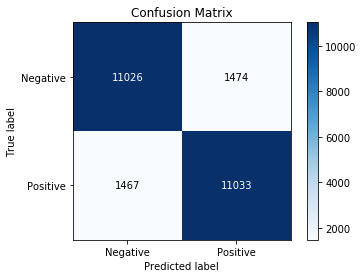

In [35]:
plot_confusion_matrix(y_test,y_pred)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np

##### As could be seen below the accuracy on the test set is around 90% which is really good considering the balanced nature of the dataset.

In [44]:
accuracy_score(y_test,y_pred)

0.88224

##### At this stage we will do the gird search in order to optimize the hyperparameters, we have 2 different parameters, C and Penalty. C is realted to the intercept and Penalty specifies Lasso or Ridge regression. Taking a quick look at the result it seems that Lasso gives better answers, and it is the default of logistic regression in sklearn.

In [45]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [46]:
clf = GridSearchCV(lr,grid, cv=5)

In [47]:
best_model=clf.fit(train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [50]:
print('Best method:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best method: l2
Best C: 10.0


#### Considering the grid search result the we have the best model with best parameters so we will model it once again with new parameters.

In [51]:
lr_final=LogisticRegression(penalty='l2',C=10)

In [52]:
lr_final.fit(train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
y_pred_final=lr_final.predict(test)

In [54]:
lr_final.score(test,y_test)

0.8818

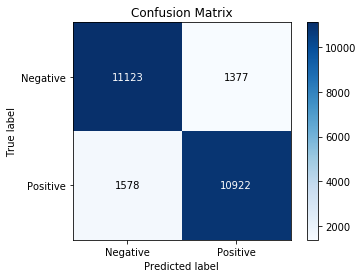

In [56]:
plot_confusion_matrix(y_test,y_pred_final)